# Domain Reconstruction

In [2]:
from Helpers.TF_reconstruction import GeoTAETr
from Main.test_manifold_algorithms import test_manifold_algorithms as tma
from mashspud.SPUD import SPUD
import matplotlib.pyplot as plt
import seaborn as sns

dc = tma("iris.csv", split = "distort", verbose = 0)

2025-03-01 13:49:29.055201: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-01 13:49:29.098049: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-01 13:49:29.110933: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-01 13:49:29.137434: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-01 13:49:31.402937: W tensorflow/comp

In [3]:
import numpy as np

def scatter_plot(x, y, labels, title="Scatter Plot", colormap="viridis", emb = None, domain = None):
    # Ensure labels is a numpy array
    labels = np.array(labels)
    unique_labels = np.unique(labels)
    # Create a colormap with as many colors as needed
    colors = plt.cm.get_cmap(colormap, len(unique_labels))
    
    plt.figure(figsize=(8,6))
    
    for i, label in enumerate(unique_labels):
        idx = labels == label
        plt.scatter(x[idx], y[idx], label=str(label), color=colors(i), s=70, alpha=0.8, edgecolor='black')
    
    if emb is not None:
        # Plot emb points as triangles; assuming emb is a (n,2) array
        plt.scatter(emb[:,0], emb[:,1], label="emb", marker="^", c=np.hstack([labels, labels]), s=40, alpha=0.8, edgecolor='black')

    if domain is not None:
        # Plot emb points as triangles; assuming emb is a (n,2) array
        plt.scatter(domain[:,0], domain[:,1], label="Domain", marker="d", c=labels, s=40, alpha=0.8, edgecolor='black')

    plt.title(title)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.grid(True)
    plt.show()

## The GeoTAETr Tests

RF score on full embedding: 0.9366666666666666
Cross Embedding score: None
Fraction of Samples Closest to thier Match: 0.0002222222222222222


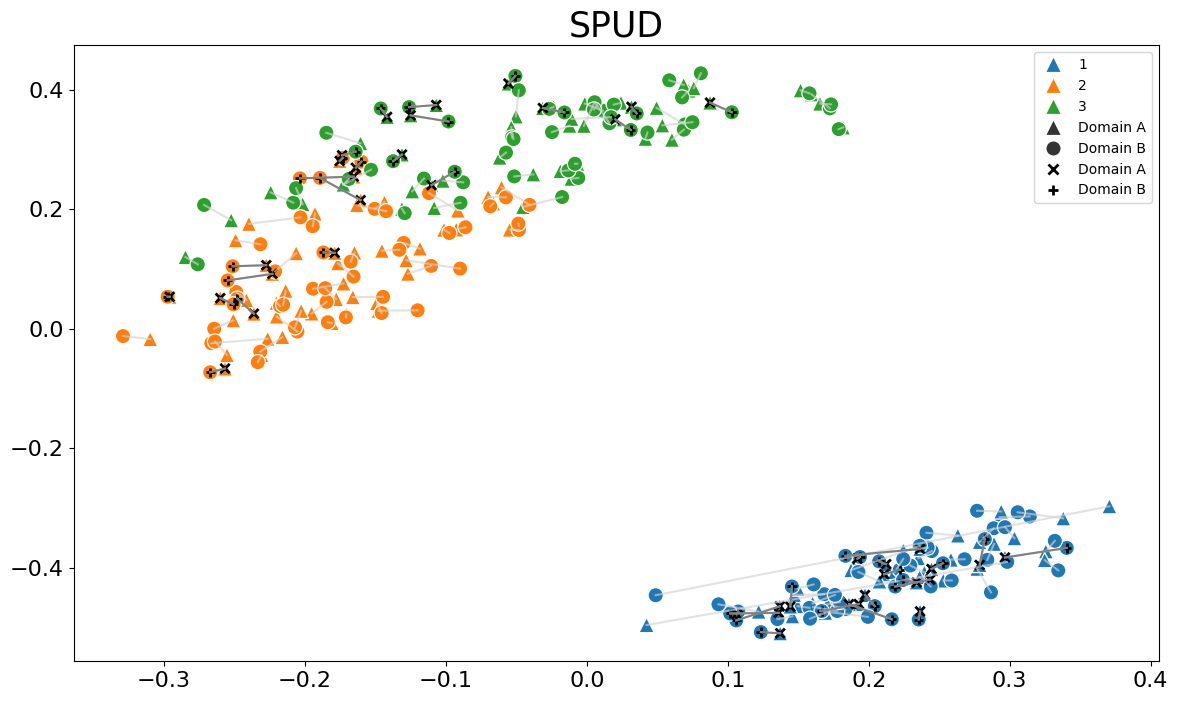

In [3]:
# Fit spud
spud = SPUD()
spud.fit(dc.split_A, dc.split_B, dc.anchors[:40])
spud.plot_emb(labels = dc.labels_doubled)

In [ ]:
# Build the GeoTAETr
geoA = GeoTAETr(verbose = 0)
geoA.fit(dc.split_A, spud.emb[:spud.len_A])

Epoch 1/50


In [ ]:
A_to_Z = geoA.encode(dc.split_A)

ValueError: Attempt to convert a value ({'input': array([0.22222222, 0.625     , 0.06779661, 0.04166667]), 'emb': array([ 0.23515625, -0.38375601])}) with an unsupported type (<class 'dict'>) to a Tensor.

In [6]:
scatter_plot(A_to_Z[:,0], A_to_Z[:,1], dc.labels, emb = spud.emb,  title="GeoTAETr", colormap="viridis")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


### GeoTAETr B structure

In [8]:
geoB = GeoTAETr(verbose = 0)
geoB.fit(dc.split_B, spud.emb[spud.len_A:])
B_to_Z = geoB.encode(dc.split_B)

Epoch 1/50


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.1446
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1349
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1282
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1246
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1221
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1207
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1203
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1203
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1202
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1198
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1190
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1179
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1169
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1161
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1156
Epoch 16/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/st

/tmp/ipykernel_187787/1890582921.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap(colormap, len(unique_labels))


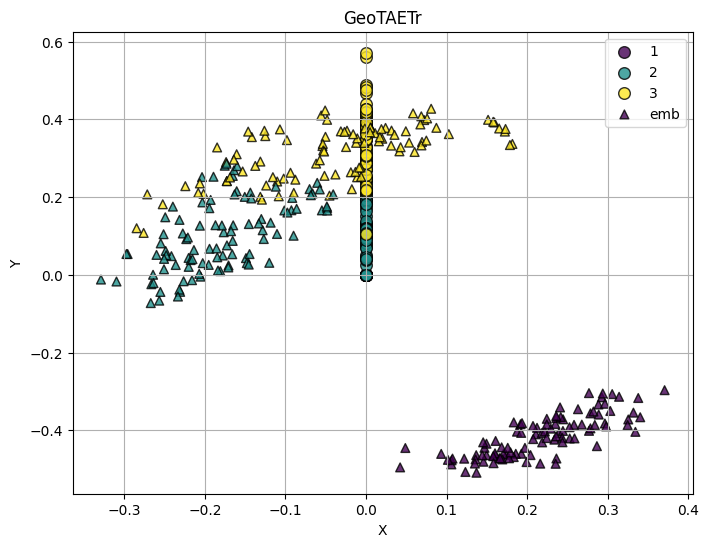

In [9]:
geoB = GeoTAETr(verbose = 0)
geoB.fit(dc.split_B, spud.emb[spud.len_A:])
B_to_Z = geoB.encode(dc.split_B)

/tmp/ipykernel_156986/1890582921.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap(colormap, len(unique_labels))


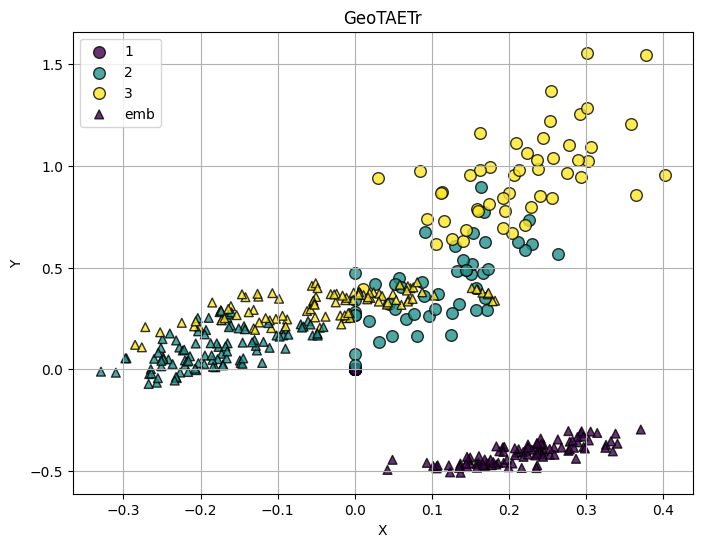

In [ ]:
scatter_plot(B_to_Z[:,0], B_to_Z[:,1], dc.labels, emb = spud.emb,  title="GeoTAETr", colormap="viridis")

1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/stepWARNING:tensorflow:5 out of the last 11 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x7f963861c1f0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/tmp/ipykernel_187787/1890582921.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap(colormap, len(unique_labels))


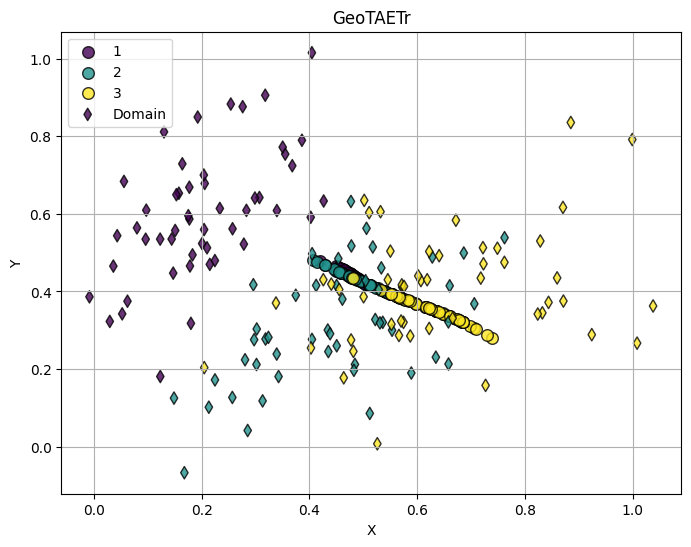

In [10]:
A_to_B = geoB.decode(A_to_Z)
scatter_plot(A_to_B[:,0], A_to_B[:,1], dc.labels, domain = dc.split_B,  title="GeoTAETr", colormap="viridis")

1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/tmp/ipykernel_187787/1890582921.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap(colormap, len(unique_labels))


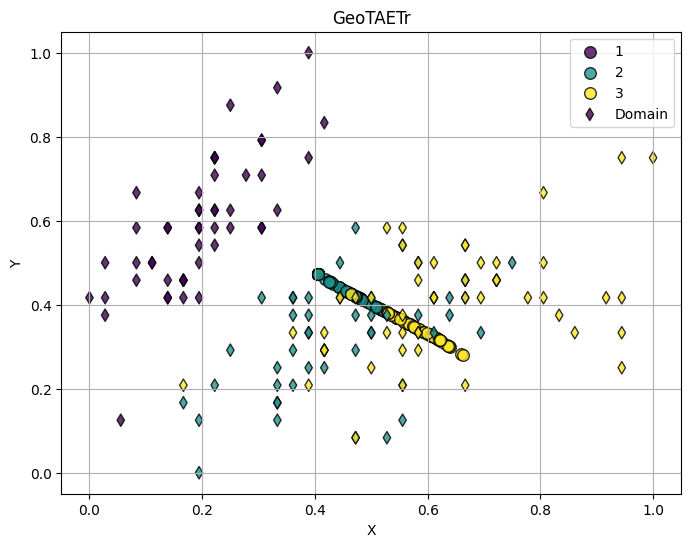

In [ ]:
A_to_B = geoB.decode(A_to_Z)
scatter_plot(A_to_B[:,0], A_to_B[:,1], dc.labels, domain = dc.split_B,  title="GeoTAETr", colormap="viridis")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


/tmp/ipykernel_156986/1890582921.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap(colormap, len(unique_labels))


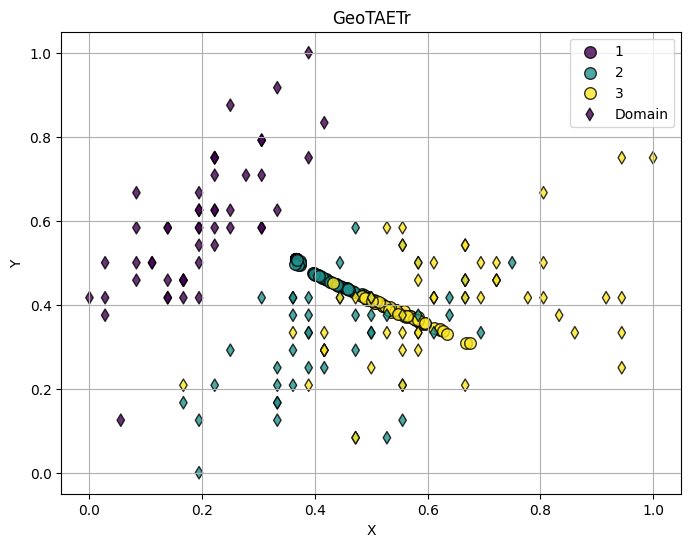

In [10]:
B_to_A = geoA.decode(B_to_Z)
scatter_plot(B_to_A[:,0], B_to_A[:,1], dc.labels, domain = dc.split_A,  title="GeoTAETr", colormap="viridis")

## Comparison against MAGAN and DTA

In [1]:
from Helpers.Pipeline_Helpers import get_MAGAN_block
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

from AlignmentMethods.MAGAN import run_MAGAN, get_pure_distance, magan 

# Get data ready
from Main.test_manifold_algorithms import test_manifold_algorithms as tma
from mashspud import SPUD 
from Helpers.Grae import *

dc4 = tma("iris.csv", split = "even", verbose = 5, random_state=12)

2025-02-28 21:10:45.985030: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-02-28 21:10:46.027755: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-02-28 21:10:46.040657: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-28 21:10:46.067352: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-02-28 21:10:48.158000: W tensorflow/comp

MDS initialized with 2 components

 
 
---------------------------       Initalizing class with iris.csv data       ---------------------------

The knn values are: (2, 6, 10, 14, 18, 22, 26, 30, 34, 38)


In [2]:
from Helpers.Pipeline_Helpers import get_MAGAN_block
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

from AlignmentMethods.MAGAN import run_MAGAN, get_pure_distance, magan 

# Get data ready
from Main.test_manifold_algorithms import test_manifold_algorithms as tma
from mashspud import SPUD 
from Helpers.Grae import *

dc4 = tma("iris.csv", split = "even", verbose = 5, random_state=12)

MDS initialized with 2 components

 
 
---------------------------       Initalizing class with iris.csv data       ---------------------------

The knn values are: (2, 6, 10, 14, 18, 22, 26, 30, 34, 38)


2025-02-28 21:10:58.577661: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:388] MLIR V1 optimization pass is not enabled


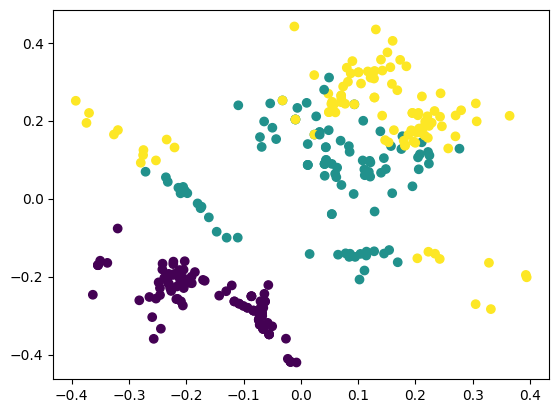

In [3]:
#Create MAGAN
domain_a, domain_b, domain_ab, domain_ba, magan = run_MAGAN(dc4.split_A, dc4.split_B, dc4.anchors[:15], 0.001, return_MAGAN=True)

#Create original block
domain_a, domain_b = get_pure_distance(domain_a, domain_b)
domain_ab, domain_ba = get_pure_distance(domain_ab, domain_ba)

#Return a different thing back to calculate FOSCTTM and CE
m_block = get_MAGAN_block([domain_a, domain_b, domain_ab, domain_ba])

mds = MDS(metric=True, dissimilarity = 'precomputed', n_init = 4,
                      n_jobs=4, random_state = 42, n_components = dc4.n_comp)
emb = mds.fit_transform(m_block)

#Plot the embedding
plt.scatter(emb[:, 0], emb[:, 1], c = dc4.labels_doubled)

/tmp/ipykernel_12934/1890582921.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap(colormap, len(unique_labels))


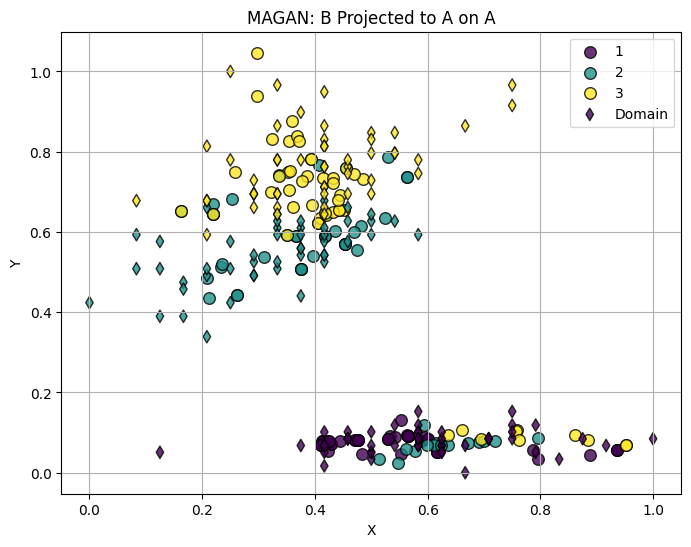

In [6]:
A_to_B = magan.translate_1_to_2(dc4.split_A)
#plt.scatter(A_to_B[:, 0], A_to_B[:, 1], c = dc4.labels)
scatter_plot(A_to_B[:,0], A_to_B[:,1], dc4.labels, domain = dc4.split_B,  title="MAGAN: B Projected to A on A", colormap="viridis")

/tmp/ipykernel_12934/1890582921.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap(colormap, len(unique_labels))


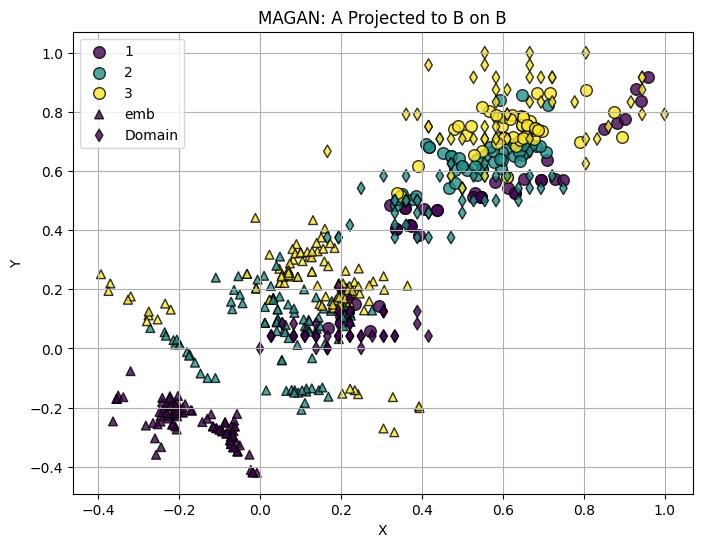

In [10]:
B_to_A = magan.translate_2_to_1(dc4.split_B)
#plt.scatter(B_to_A[:, 0], B_to_A[:, 1], c = dc4.labels)
scatter_plot(B_to_A[:,0], B_to_A[:,1], dc4.labels, domain = dc4.split_A, emb = emb, title="MAGAN: A Projected to B on B", colormap="viridis")

In [17]:
A_to_A = magan.translate_2_to_1(A_to_B)
#plt.scatter(A_to_A[:, 0], A_to_A[:, 1], c = dc4.labels)
scatter_plot(A_to_A[:,0], A_to_A[:,1], dc4.labels, domain = dc4.split_A,  title="MAGAN: A Projected to A on A", colormap="viridis")

(150, 2)

In [6]:
dc4.split_A.shape

(150, 2)

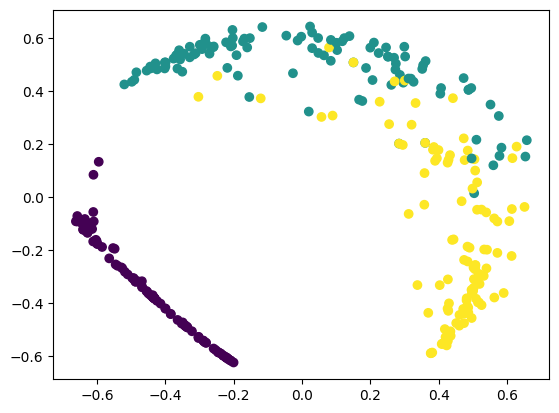

In [18]:
from Helpers.Pipeline_Helpers import Andres_fit
from AlignmentMethods.DTA_andres import DTA

dta = DTA(knn = 35,random_state=42, t = 20, verbose = 0)
dta = Andres_fit(dta, dc4, dc4.anchors[:15])
dta_block = 1 - tma.normalize_0_to_1(None, dta.W)
dta_emb = mds.fit_transform(dta_block)
plt.scatter(dta_emb[:, 0], dta_emb[:, 1], c = dc4.labels_doubled)

/tmp/ipykernel_12934/1890582921.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap(colormap, len(unique_labels))


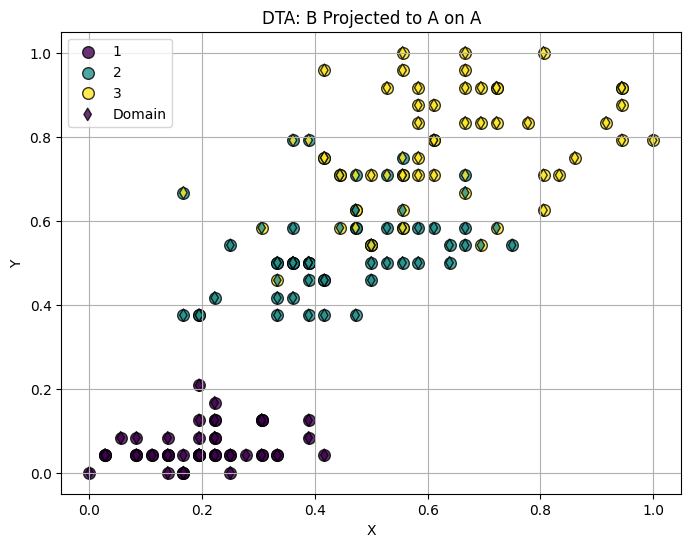

In [64]:
B_to_A = dta.T @ dc4.split_A
#plt.scatter(B_to_A[:, 0], B_to_A[:, 1], c = dc4.labels[:150])
scatter_plot(B_to_A[:,0], B_to_A[:,1], dc4.labels[:150], domain = dc4.split_A,  title="DTA: B Projected to A on A", colormap="viridis")

/tmp/ipykernel_12934/1890582921.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap(colormap, len(unique_labels))


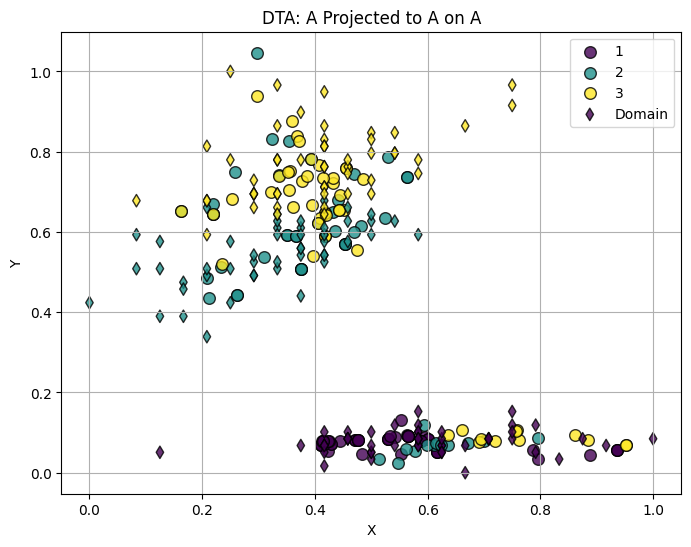

In [60]:
#Full cycle? Just a theory
A_to_A = dta.T @ A_to_B
#plt.scatter(A_to_A[:, 0], A_to_A[:, 1], c = dc4.labels[:150])
scatter_plot(A_to_A[:,0], A_to_A[:,1], dc4.labels[:150], domain = dc4.split_B,  title="DTA: A Projected to A on A", colormap="viridis")

## MASH

Splitting the data randomly
Split A features shape: (199, 5)
Split B Features shape (199, 2)
MDS initialized with 2 components

 
 
---------------------------       Initalizing class with seeds.csv data       ---------------------------

The knn values are: (2, 6, 10, 14, 18, 22, 26, 30, 34, 38)
Cross Embedding score: None
Fraction of Samples Closest to thier Match: 0.303830711345673
RF score trained on full Embedding: 0.7336683417085427


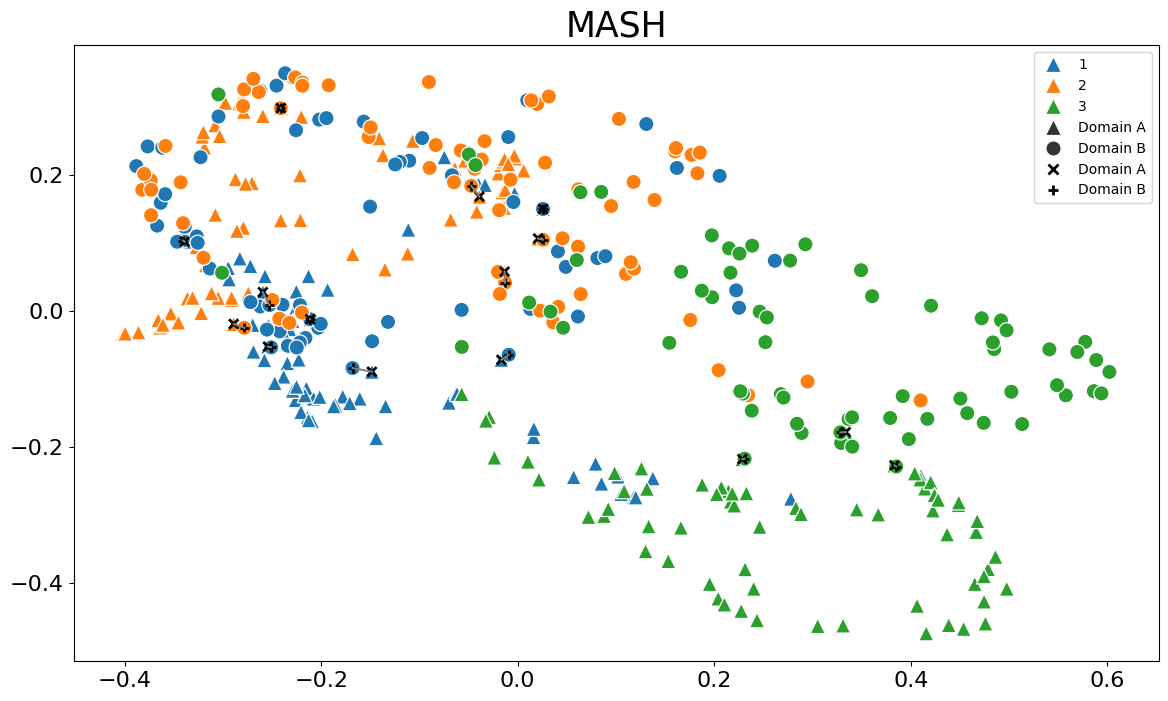

In [74]:
from mashspud.MASH import MASH
import matplotlib.pyplot as plt
dc4 = tma("seeds.csv", split = "random", verbose = 4, random_state=62)
mash = MASH(knn = 8, random_state=42, verbose = 0, t = -1)
mash.fit(dc4.split_A, dc4.split_B, dc4.anchors[:15])
mash.plot_emb(labels = dc4.labels_doubled, show_lines = False)


/tmp/ipykernel_24910/1890582921.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap(colormap, len(unique_labels))


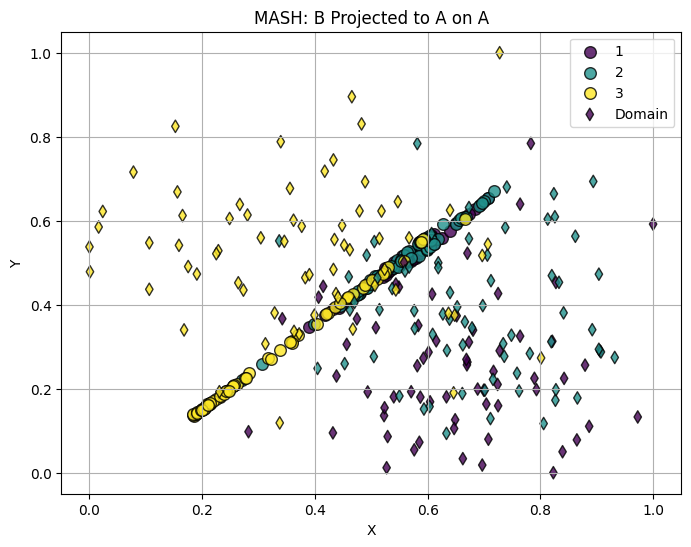

In [75]:
A_to_B = mash.project_feature(predict_with = "A")
scatter_plot(A_to_B[:,0], A_to_B[:,1], dc4.labels, domain = dc4.split_B,  title="MASH: B Projected to A on A", colormap="viridis")

/tmp/ipykernel_24910/1890582921.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap(colormap, len(unique_labels))


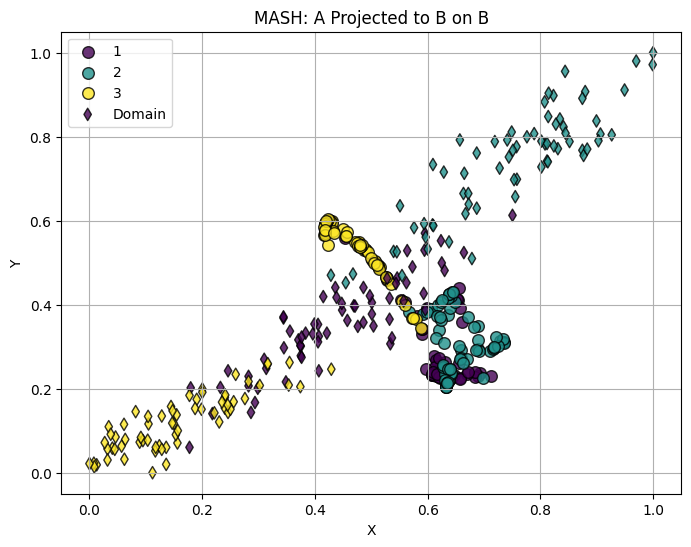

In [76]:
B_to_A = mash.project_feature(predict_with = "B")
scatter_plot(B_to_A[:,0], B_to_A[:,1], dc4.labels, domain = dc4.split_A,  title="MASH: A Projected to B on B", colormap="viridis")

In [77]:
import random

#random_numbers = random.sample(range(150), 150)
random_numbers = range(150)
print(random_numbers)

range(0, 150)


In [78]:
dc4.split_A.shape[1], dc4.split_B.shape[1]

(5, 2)

In [87]:
from sklearn.decomposition import PCA

# Perform PCA on projectionBA
pca = PCA(n_components=dc4.split_A.shape[1])
projectionBA_pca = pca.fit_transform(mash.projectionBA.T).T

pca = PCA(n_components=dc4.split_B.shape[1])
projectionBA_pca = pca.fit_transform(projectionBA_pca)

projectionBA_pca = 2 * (projectionBA_pca - projectionBA_pca.min()) / (projectionBA_pca.max() - projectionBA_pca.min()) - 1
projectionBA_pca.shape, projectionBA_pca.max(), projectionBA_pca.min()


((5, 2), 1.0, -1.0)

In [94]:
projectionBA_pca.shape, dc4.split_B[random_numbers].T.shape

((5, 2), (2, 150))

/tmp/ipykernel_24910/1890582921.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap(colormap, len(unique_labels))


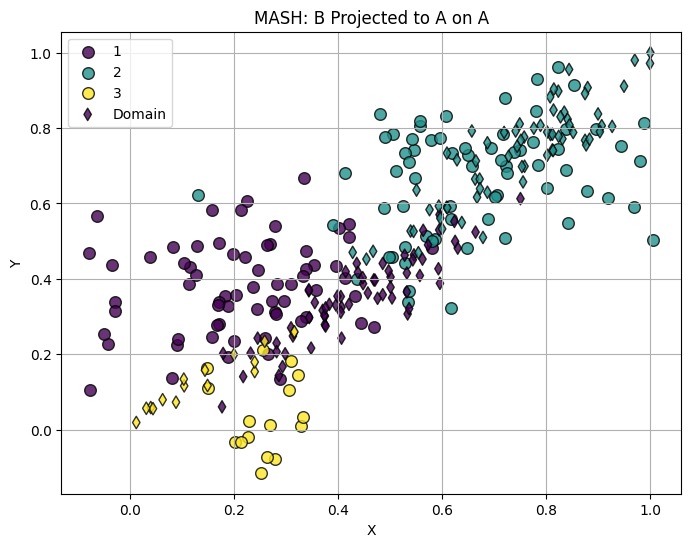

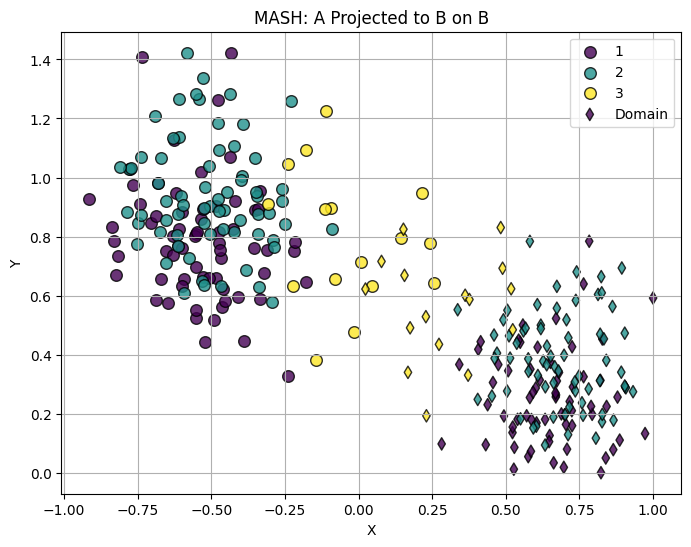

In [95]:
#Normalize to do it DTA style
# mash.projectionBA = mash.projectionBA / mash.projectionBA.max()
# mash.projectionAB = mash.projectionAB / mash.projectionAB.max()

A_to_B = dc4.split_A[random_numbers] @ projectionBA_pca
scatter_plot(A_to_B[:,0], A_to_B[:,1], dc4.labels[random_numbers], domain = dc4.split_A[random_numbers],  title="MASH: B Projected to A on A", colormap="viridis")
plt.show()

B_to_A = (projectionBA_pca @ dc4.split_B[random_numbers].T).T
scatter_plot(B_to_A[:,0], B_to_A[:,1], dc4.labels[random_numbers], domain = dc4.split_B[random_numbers],  title="MASH: A Projected to B on B", colormap="viridis")